<a href="https://colab.research.google.com/github/phdnico/physionet/blob/master/physionet_usando_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

esto lo realice en 2017/2018 con Python 2.X
(ver ambientes virtuales)

te cuento que los datos del ATM los baje con 
https://github.com/MIT-LCP/wfdb-python  
para tener un ambiente empaquetado y que te funcione te recomiendo 
https://www.anaconda.com/distribution/ 
lo que no recuerdo ó habría que probrar es si funciona  wfdb-python  con 2.7 o con que versión.

![img](https://user-images.githubusercontent.com/50641494/85225408-5aa69b80-b3a7-11ea-8c22-da5a030da871.PNG)

[Physionet](https://physionet.org/)

### COLLABORATIVE INSTITUTIONAL TRAINING INITIATIVE (CITI PROGRAM)
[citiprogram](https://www.citiprogram.org/verify/?k8e6410f7-6dbc-41d8-ae12-9b29f7b6372f-24580999)

# Cargamos las librerias

In [1]:
import wfdb
import numpy as np
import os
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as  pd

ImportError: ignored

In [ ]:

def bajarDatos(nombrePaciente,urlBaseDeDatos='sampledata/',cantidadDeMuestras = ''):
    
    pathUrl = urlBaseDeDatos+nombrePaciente
    #record = wfdb.rdsamp(pathUrl, sampto=2000)
    if cantidadDeMuestras =='':
        record = wfdb.rdsamp(nombrePaciente, pbdir = urlBaseDeDatos)
        # Esto lo dejo ahora asi por que no tengo ancho de banda y son demasiados datos
        #record = wfdb.rdsamp(nombrePaciente, pbdir = urlBaseDeDatos,sampto=200)
    else:
        record = wfdb.rdsamp(nombrePaciente, pbdir = urlBaseDeDatos,sampto=cantidadDeMuestras)
    #wfdb.plotrec(record, title='Record: '+nombrePaciente+'from Physionet '+urlBaseDeDatos) 
    #display(record.__dict__)
    cantidadDeColumnas = len(record.signame[:])
    seniales = np.ndarray.flatten(record.p_signals)
    tamanioCorte = len(seniales)/cantidadDeColumnas
    
    print("longitud de la suma de señales: "+str(len(seniales)))
    print("cantidad de columnas: "+str(cantidadDeColumnas))
    print("longitud de cada columna: "+str(tamanioCorte))
    print("variables: "+str(record.signame))
    reFactorizacion = seniales.reshape(tamanioCorte,cantidadDeColumnas)
    df = pd.DataFrame(reFactorizacion, columns =record.signame)
    df.to_csv(nombrePaciente+'.csv')
    
    

In [ ]:
bajarDatos('a103l','challenge/2015/training/',10)

longitud de la suma de señales: 30
cantidad de columnas: 3
longitud de cada columna: 10
variables: ['II', 'V', 'PLETH']


In [ ]:
prueba = pd.read_csv('a103l.csv')

In [ ]:
prueba.head()

,Unnamed: 0,II,V,PLETH
0,0,-0.023596,0.867586,0.482203
1,1,-0.036981,0.982985,0.544374
2,2,-0.062923,0.859791,0.478212
3,3,-0.092452,0.788783,0.442857
4,4,-0.094522,0.851996,0.474302


In [ ]:
bajarDatos('charis1','charisdb/',100)

longitud de la suma de señales: 300
cantidad de columnas: 3
longitud de cada columna: 100
variables: ['ABP', 'ECG', 'ICP']


### vamos a descargar los datos pacientes de mimicII con pic

30


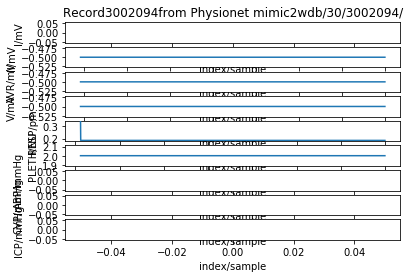

longitud de la suma de señales: 18000
cantidad de columnas: 9
longitud de cada columna: 2000
variables: ['I', 'II', 'AVR', 'V', 'RESP', 'PLETH', 'ABP', 'CVP', 'ICP']
30


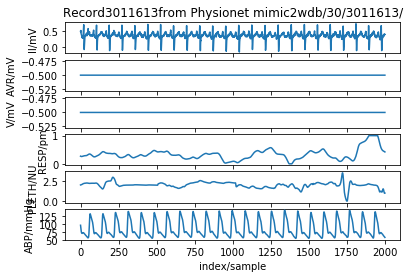

longitud de la suma de señales: 12000
cantidad de columnas: 6
longitud de cada columna: 2000
variables: ['II', 'AVR', 'V', 'RESP', 'PLETH', 'ABP']
39


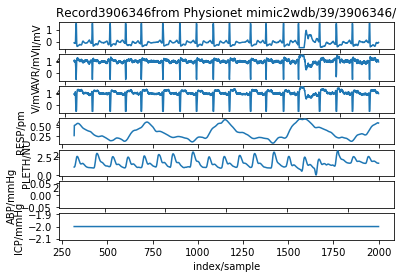

longitud de la suma de señales: 14000
cantidad de columnas: 7
longitud de cada columna: 2000
variables: ['II', 'AVR', 'V', 'RESP', 'PLETH', 'ABP', 'ICP']


In [ ]:

listaPacientesConICP = ['3002094','3011613','3906346']

#mimic2wdb/30/3002094/


for paciente in listaPacientesConICP:
    print(paciente[0:2])
    subCarpeta = paciente[0:2]
    rutaMimic2wdb = "mimic2wdb/"+subCarpeta+"/"+paciente+"/"
    bajarDatos(paciente,rutaMimic2wdb,2000)


In [ ]:
prueba = pd.read_csv('3002094.csv')

In [ ]:
prueba

,Unnamed: 0,I,II,AVR,V,RESP,PLETH,ABP,CVP,ICP
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Ruta con CHARISDB

In [ ]:
#listaPacientesConICP = ['charis1','charis2','charis3','charis4','charis5','charis6','charis7',
#                        'charis8','charis9','charis10','charis11','charis12','charis13']

#mimic2wdb/30/3002094/

listaPacientesConICP = ['charis4']

for paciente in listaPacientesConICP:
    print(paciente)
    rutaCharisDB = "charisdb/"
    bajarDatos(paciente,rutaCharisDB)
    print("--------------------------")
    print("")

charis4
longitud de la suma de señales: 21599997
cantidad de columnas: 3
longitud de cada columna: 7199999
variables: ['ABP', 'ECG', 'ICP']
--------------------------



In [ ]:
pd.read_csv('charis2.csv')

KeyboardInterrupt: 

In [ ]:
0.00033/0.020


0.0165

In [ ]:
0.040/0.00067

59.701492537313435

In [ ]:
second = pd.read_csv('charis112second.csv')
second.head()
second["'Elapsed time'"][1:52]

1     0.000
2     0.020
3     0.040
4     0.060
5     0.080
6     0.100
7     0.120
8     0.140
9     0.160
10    0.180
11    0.200
12    0.220
13    0.240
14    0.260
15    0.280
16    0.300
17    0.320
18    0.340
19    0.360
20    0.380
21    0.400
22    0.420
23    0.440
24    0.460
25    0.480
26    0.500
27    0.520
28    0.540
29    0.560
30    0.580
31    0.600
32    0.620
33    0.640
34    0.660
35    0.680
36    0.700
37    0.720
38    0.740
39    0.760
40    0.780
41    0.800
42    0.820
43    0.840
44    0.860
45    0.880
46    0.900
47    0.920
48    0.940
49    0.960
50    0.980
51    1.000
Name: 'Elapsed time', dtype: object

In [ ]:
1/0.02

50.0